(statistics-hs:random-variables:discrete)=
# Variabili casuali discrete

## Funzione di probabilità
La funzione di probabilità, $p_X(x)$, o funzione di massa, o *densità di probabilità* con un abuso per analogia con le variabili continue, è la funzione che associa la probabilità al valore $x$ della variabile casuale $X$. Data al variabile casuale $X: \Omega \rightarrow E$, la proababilità del valore discreto $x \in E$ è data dalla somma delle probabilità degli eventi disgiunti $\Omega_x := \{ \omega \in \Omega \, | \, X(\omega) = x \}$ che producono il valore $x$,

$$p_X(x) = \sum_{\omega_i \in \Omega_x} \nu(\omega_i) \ .$$

**Proprietà.** 
- $p_X \ge 0$
- $\sum_{x_k \in E} p_X(x_k) = 1$

E da queste due proprietà segue che la probabilità del singolo valore è non superiore a 1, $p(x_k) \le 1$.






## Esempi di variabili discrete
Si anticipano qui alcuni [esempi di variabili casuali discrete](), rapprestandone la loro distribuzione di probabilità: la distribuzione di Bernoulli, la distribuzione binomiale, e la distribuzione di Poisson. La distribuzione di **Bernoulli** può rappresentare la probabilità che il lancio di una moneta dia testa:$0$ o croce:$1$, la distribuzione **binomiale** può rappresentare la probabilità di ottenere $x$ volte croce in $n$ lanci; la distribuzione di **Poisson** viene usata per rappresentare eventi discreti rari, dei quali si conosce la media $\lambda$.

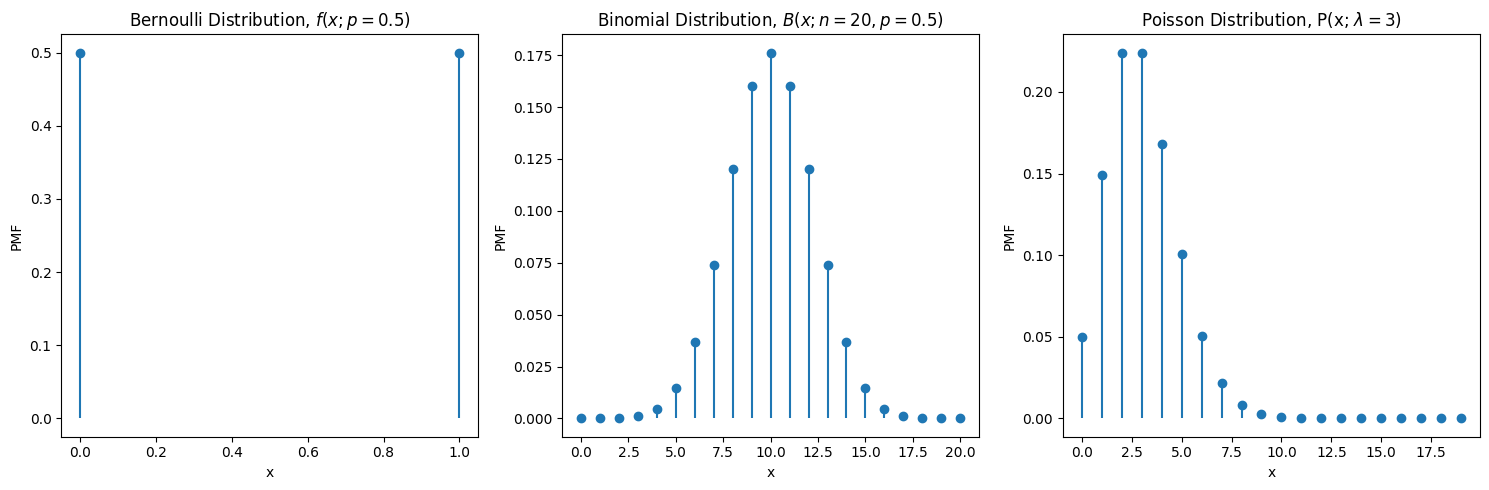

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson

# Define parameters for the distributions
p_bernoulli = 0.5                 # Probability for Bernoulli
n_binomial, p_binomial = 20, 0.5  # Number of trials and probability for Binomial
n_poisson, mu_poisson = 20, 3     # Mean for Poisson

# Create x values for the distributions
x_bernoulli = [0, 1]
x_binomial = np.arange(0, n_binomial + 1)
x_poisson = np.arange(0, n_binomial)  # Arbitrary range for Poisson

# Calculate the probabilities
y_bernoulli = bernoulli.pmf(x_bernoulli, p_bernoulli)
y_binomial = binom.pmf(x_binomial, n_binomial, p_binomial)
y_poisson = poisson.pmf(x_poisson, mu_poisson)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Bernoulli
axes[0].stem(x_bernoulli, y_bernoulli, basefmt=" ", use_line_collection=True)
axes[0].set_title(f"Bernoulli Distribution, $f\\left(x; p={p_bernoulli} \\right)$")
axes[0].set_xlabel("x")
axes[0].set_ylabel("PMF")

# Plot Binomial
axes[1].stem(x_binomial, y_binomial, basefmt=" ", use_line_collection=True)
axes[1].set_title(f"Binomial Distribution, $B(x; n={n_binomial},p={p_bernoulli})$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("PMF")

# Plot Poisson
axes[2].stem(x_poisson, y_poisson, basefmt=" ", use_line_collection=True)
axes[2].set_title(f"Poisson Distribution, P(x; $\\lambda={mu_poisson}$)")
axes[2].set_xlabel("x")
axes[2].set_ylabel("PMF")

# Adjust layout
plt.tight_layout()
plt.show()


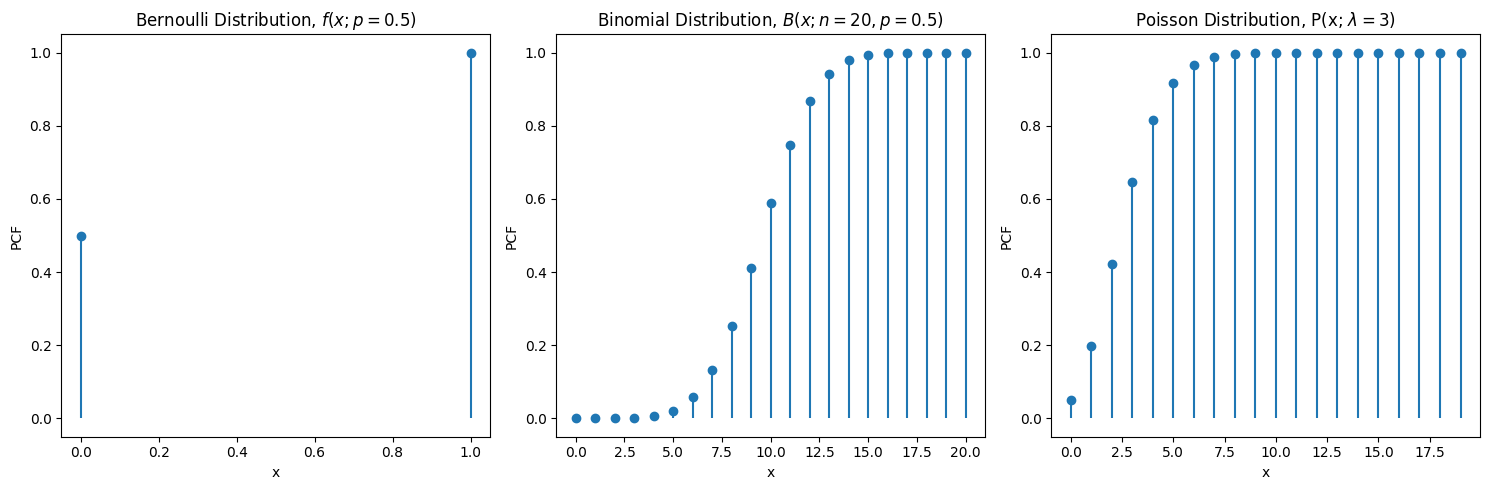

In [31]:

#> Cumulative function
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Bernoulli
axes[0].stem(x_bernoulli, np.cumsum(y_bernoulli), basefmt=" ", use_line_collection=True)
axes[0].set_title(f"Bernoulli Distribution, $f\\left(x; p={p_bernoulli} \\right)$")
axes[0].set_xlabel("x")
axes[0].set_ylabel("PCF")

# Plot Binomial
axes[1].stem(x_binomial, np.cumsum(y_binomial), basefmt=" ", use_line_collection=True)
axes[1].set_title(f"Binomial Distribution, $B(x; n={n_binomial},p={p_bernoulli})$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("PCF")

# Plot Poisson
axes[2].stem(x_poisson, np.cumsum(y_poisson), basefmt=" ", use_line_collection=True)
axes[2].set_title(f"Poisson Distribution, P(x; $\\lambda={mu_poisson}$)")
axes[2].set_xlabel("x")
axes[2].set_ylabel("PCF")

# Adjust layout
plt.tight_layout()
plt.show()


## Momenti
**Valore medio.** Il valore medio di una variabile casuale è la media dei valori possibili $x_k \in E$ pesata della probabilità $p(x_k)$,

$$\begin{aligned}
 \mu_X = \text{E}[X] 
  & := \sum_{x_k \in E} p(x_k) x_k = \\
  & = \sum_{x_k \in E} \sum_{\omega_i \in \Omega_x} \nu(\omega_i) X(\omega_i) = \\
  & = \sum_{\omega_i \in \Omega} \nu(\omega_i) X(\omega_i) \ .
\end{aligned}$$

equivalente alla media dei valori della variabile $X(\omega_i)$ pesata sulle probabilità degli eventi $\omega_i \in \Omega$. La media di una varaibile casuale $X$ viene comunemente indicata con $\mu_X$, e così verrà fatto in seguito per motivi di sintesi.

**Varianza.** La varianza è una misura della dispersione dei valori di una varaibile casuale attorno al suo valore medio, ed è definita come la media pesata degli scarti quadratici,

$$\sigma^2_X = E[(X-\mu_X)^2] = \sum_k p(x_k) (x_k - \mu_X)^2 \ .$$

Analogamente a quanto fatto per il valore medio, anche questa media può essere riferita sia ai valori sia agli eventi.

La **variazione standard** è definita come la radice quadra della varianza. A differenza della varianza, è una grandezza *omogenea* **(!)** alla variabile casuale: ad esempio, la media di una misura di lunghezza può essere $2 \, m$ con deviazione standard $0.1 \, m$, mentre la varianza è $0.01 \, m^2$.

Di seguito vengono mostrati il valore medio e la deviazione standard - rappresentata qui come un intervallo centrato attorno alla media, anche se questa rappresentazione può essere ingannevole **(!)** per distribuzioni di probabilità non simmetriche - delle variabili casuali presentate in precedenza. In seguito, verrà introdotto il concetto di *intervallo di confidenza*. **todo** *riferimento?*

**Oss.** Nonostante siano rappresentati in tutto il grafico, si deve pensare alla media come un valore sull'asse $x$ dei valori della variabile casuale, e la deviazione standard come un intervallo sullo stesso asse $x$, ricordando le osservazioni fatte in precedenza sulla rappresentazione della deviazione standard.

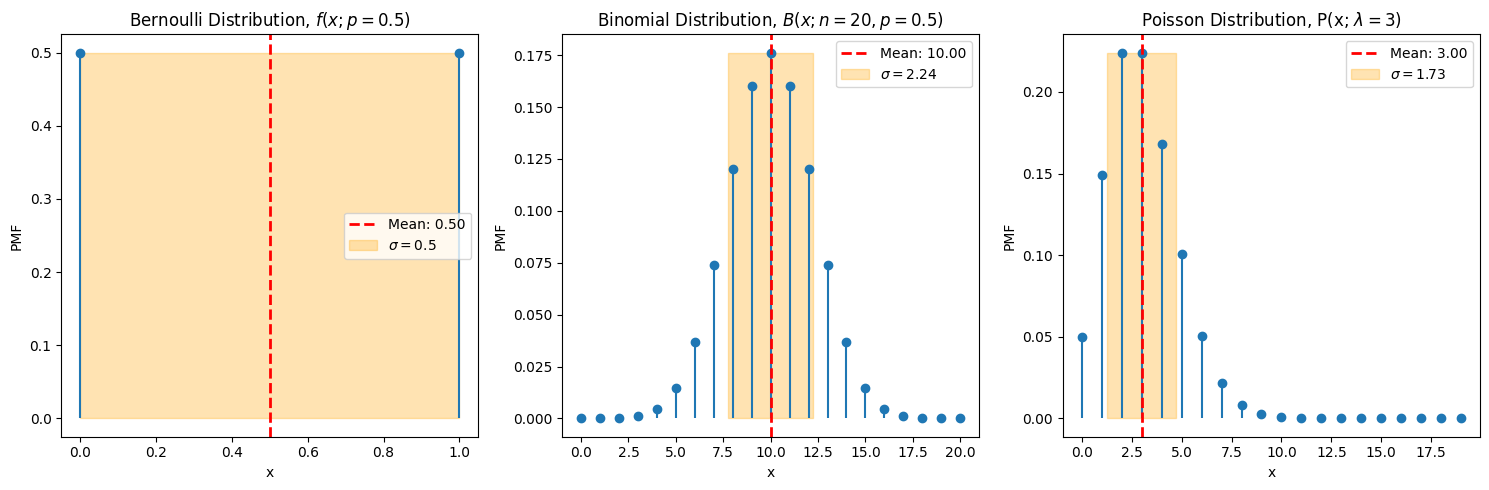

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson

# Define parameters for the distributions
p_bernoulli = 0.5   # Probability for Bernoulli
n_binomial, p_binomial = 20, 0.5  # Trials and probability for Binomial
n_poisson, mu_poisson = 20, 3      # Mean for Poisson

# Create x values and calculate PMF for each distribution
x_bernoulli = [0, 1]
y_bernoulli = bernoulli.pmf(x_bernoulli, p_bernoulli)
mean_bernoulli, var_bernoulli = bernoulli.stats(p_bernoulli, moments='mv')

x_binomial = np.arange(0, n_binomial + 1)
y_binomial = binom.pmf(x_binomial, n_binomial, p_binomial)
mean_binomial, var_binomial = binom.stats(n_binomial, p_binomial, moments='mv')

x_poisson = np.arange(0, n_poisson)  # Arbitrary range for Poisson
y_poisson = poisson.pmf(x_poisson, mu_poisson)
mean_poisson, var_poisson = poisson.stats(mu_poisson, moments='mv')

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Bernoulli Distribution
axes[0].stem(x_bernoulli, y_bernoulli, basefmt=" ", use_line_collection=True)
axes[0].axvline(mean_bernoulli, color='red', linestyle='--', linewidth=2, label=f'$\mu$: {mean_bernoulli:.2f}')
axes[0].fill_betweenx([0, max(y_bernoulli)], x1=mean_bernoulli - np.sqrt(var_bernoulli), x2=mean_bernoulli + np.sqrt(var_bernoulli), color='orange', alpha=0.3, label=f"$\sigma = {np.sqrt(var_bernoulli)}$")
axes[0].set_title(f"Bernoulli Distribution, $f\\left(x; p={p_bernoulli} \\right)$")
axes[0].set_xlabel("x")
axes[0].set_ylabel("PMF")
axes[0].legend()

# Plot Binomial Distribution
axes[1].stem(x_binomial, y_binomial, basefmt=" ", use_line_collection=True)
axes[1].axvline(mean_binomial, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_binomial:.2f}')
axes[1].fill_betweenx([0, max(y_binomial)], x1=mean_binomial - np.sqrt(var_binomial), x2=mean_binomial + np.sqrt(var_binomial), color='orange', alpha=0.3, label=f"$\sigma = {np.sqrt(var_binomial):0.2f}$")
axes[1].set_title(f"Binomial Distribution, $B(x; n={n_binomial},p={p_bernoulli})$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("PMF")
axes[1].legend()

# Plot Poisson Distribution
axes[2].stem(x_poisson, y_poisson, basefmt=" ", use_line_collection=True)
axes[2].axvline(mean_poisson, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_poisson:.2f}')
axes[2].fill_betweenx([0, max(y_poisson)], x1=mean_poisson - np.sqrt(var_poisson), x2=mean_poisson + np.sqrt(var_poisson), color='orange', alpha=0.3, label=f"$\sigma = {np.sqrt(var_poisson):0.2f}$")
axes[2].set_title(f"Poisson Distribution, P(x; $\\lambda={mu_poisson}$)")
axes[2].set_xlabel("x")
axes[2].set_ylabel("PMF")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()



<!-- **media, moda.** -->

## Variabili casuali multi-dimensionali
- **Probabilità congiunta.** $p(x,y)$
- **Probabilità condizionale.** $p(x|y)$
- **Probabilità marginale.** $p(x)$

### Probabilità congiunta e teorema di Bayes
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

### Variabili indipendenti
Due variabili casuali sono indipendenti se la probabilità condizionale di una variabile coincide con la sua probabilità marginale,

$$p(x|y) = p(x) \ ,$$

così che la probabilità congiunta di due variabili casuali indipendenti è il prodotto delle probabilità marginali,

$$p(x,y) = p(x)p(y) \ .$$

### Covarianza

$$\sigma^2_{ij} = E[(X_i-\mu_i)(X_j-\mu_j)] = R_{ij} - \mu_i \mu_j$$

### Correlazione

$$\rho_{XY} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{E[(X-\mu_X)^2]^{1/2} \, E[(X-\mu_X)^2]^{1/2}} = \frac{\sigma_{XY}^2}{\sigma_X \, \sigma_Y}$$